In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import random
from helper_cleaning import *
import seaborn as sns

In [2]:
fake_path = "./csv_files/Fake.csv"
true_path = "./csv_files/True.csv"

fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_df["labels"] = 1
true_df["labels"] = 0

In [6]:
fake_df.head()

,title,text,subject,date,labels
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
true_df.head()

,title,text,subject,date,labels
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [8]:
# Combine both csv

df = pd.concat([fake_df, true_df])
df.head()

,title,text,subject,date,labels
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [9]:
df = df.drop(["subject", "date", "title"], axis=1)
df = df.drop_duplicates()
df.head()

,text,labels
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [10]:
# NaN Values?

print(df.isna().sum())

text      0
labels    0
dtype: int64


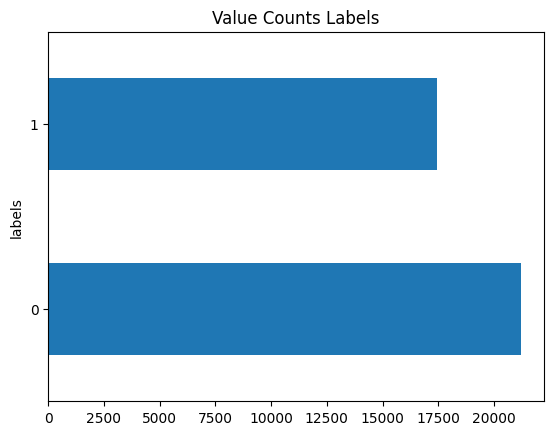

In [11]:
df["labels"].value_counts().plot(kind="barh", title="Value Counts Labels")
plt.show()

In [12]:
# shuffle DataFrame

df = df.sample(frac=1, random_state=42)
df.head()

,text,labels
18652,(This September 29 has been corrected to fix ...,0
5890,(Reuters) - U.S. President Donald Trump said o...,0
21039,PRISTINA (Reuters) - Kosovo s center-right coa...,0
4137,WASHINGTON (Reuters) - President Donald Trump ...,0
4156,A Pennsylvania man apparently failed basic bio...,1


In [13]:
# Print random News
def print_random_news(df):
    idx = random.randint(0, len(df) - 1)
    news = df.iloc[idx]
    news_type = 'Real News' if news['labels'] == 0 else 'Fake News'
    print(f"Label: {news_type}\nText: {news['text']}\n\n\n")

In [14]:
for i in range(4):
    print_random_news(df)

Label: Fake News
Text: On Thursday, Donald Trump eased sanctions against Russia s spy agencies following a phone call last week with brutal Russian dictator and Trumpfriend Vladimir Putin. Details of the call have been scarce, limited to a vague, one-paragraph statement posted on the White House website:President Donald J. Trump received a congratulatory call today from Russian President Vladimir Putin. The call lasted approximately one hour and ranged in topics from mutual cooperation in defeating ISIS to efforts in working together to achieve more peace throughout the world including Syria. The positive call was a significant start to improving the relationship between the United States and Russia that is in need of repair. Both President Trump and President Putin are hopeful that after today s call the two sides can move quickly to tackle terrorism and other important issues of mutual concern.Many have been wondering why information about the specifics of the call has been so scarce

In [15]:
texts_clean = []
for text in df["text"].values:
    texts_clean.append(
        remove_mult_spaces(
            filter_chars(clean_hashtags(strip_all_entities(remove_emojis(text))))
        )
    )

df["clean_text"] = texts_clean
df.head()

,text,labels,clean_text
18652,(This September 29 has been corrected to fix ...,0,this september 29 has been corrected to fix da...
5890,(Reuters) - U.S. President Donald Trump said o...,0,reuters us president donald trump said on frid...
21039,PRISTINA (Reuters) - Kosovo s center-right coa...,0,pristina reuters kosovo s centerright coalitio...
4137,WASHINGTON (Reuters) - President Donald Trump ...,0,washington reuters president donald trump on f...
4156,A Pennsylvania man apparently failed basic bio...,1,a pennsylvania man apparently failed basic bio...


In [16]:
text_len = []
for text in df["clean_text"].values:
    length = len(text.split())
    text_len.append(length)

df["word_count"] = text_len
df.head()

,text,labels,clean_text,word_count
18652,(This September 29 has been corrected to fix ...,0,this september 29 has been corrected to fix da...,417
5890,(Reuters) - U.S. President Donald Trump said o...,0,reuters us president donald trump said on frid...,600
21039,PRISTINA (Reuters) - Kosovo s center-right coa...,0,pristina reuters kosovo s centerright coalitio...,325
4137,WASHINGTON (Reuters) - President Donald Trump ...,0,washington reuters president donald trump on f...,463
4156,A Pennsylvania man apparently failed basic bio...,1,a pennsylvania man apparently failed basic bio...,353


In [17]:
df = df.drop(["text"], axis=1)

In [18]:
df = df.sort_values(by="word_count", ascending=False)
df.head(20)

,labels,clean_text,word_count
22303,1,funny how secrets travel i d start to believe ...,8121
21978,1,shawn helton 21st century wirealthough many ar...,7924
22506,1,shawn helton 21st century wirethe 1994 cult fi...,7193
9731,1,we just discovered another reason not to suppo...,7017
12406,1,there have been many articles written about ge...,6593
22013,1,one of the ancillary benefits of donald trump ...,6244
21920,1,patrick henningsen and shawn helton 21st centu...,5793
22347,1,patrick henningsen 21st century wire the mains...,5718
21929,1,shawn helton 21st century wiresince late octob...,5651
22395,1,patrick henningsen 21st century wiretoday amer...,5573


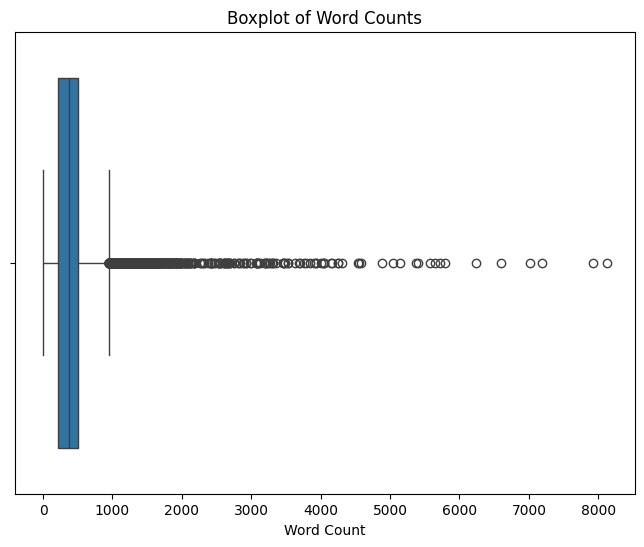

In [19]:
# Show Word Count Balance

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['word_count'])
plt.title('Boxplot of Word Counts')
plt.xlabel('Word Count')
plt.show()

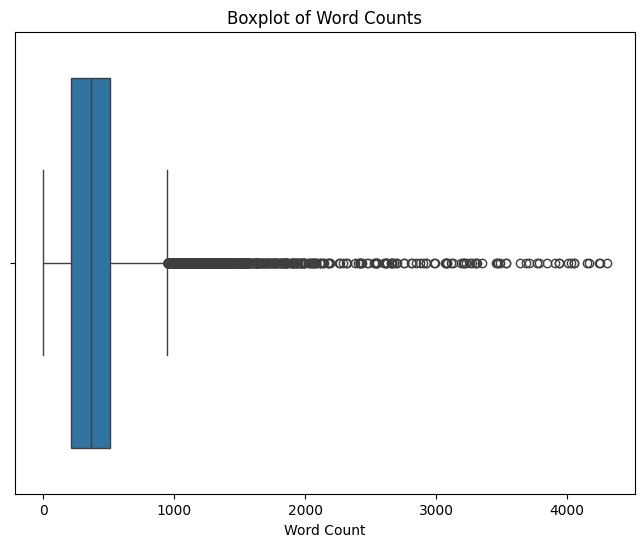

In [20]:
df = df[df["word_count"] < 4500]

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['word_count'])
plt.title('Boxplot of Word Counts')
plt.xlabel('Word Count')
plt.show()

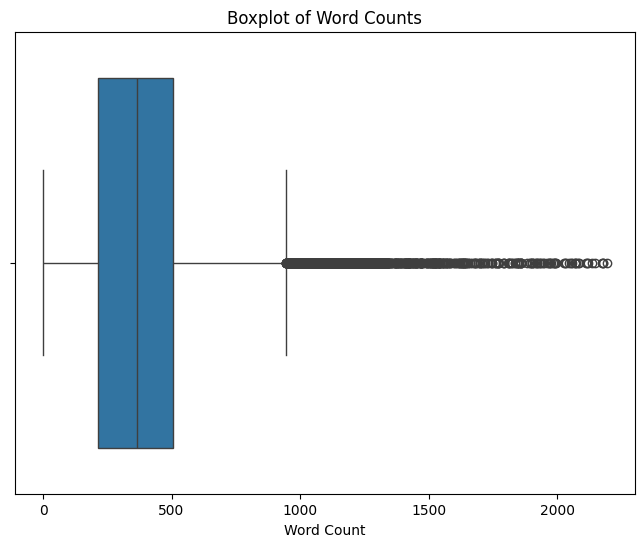

In [21]:
df = df[df["word_count"] < 2200]

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['word_count'])
plt.title('Boxplot of Word Counts')
plt.xlabel('Word Count')
plt.show()

In [22]:
df.tail(150)

,labels,clean_text,word_count
11970,1,ownage pictwittercomyznlkcyimw paul joseph wat...,8
13469,1,yes he did promise to support donald trump,8
14334,1,how many i think we ve lost count,8
13406,1,wow the dems are so out of touch,8
14136,1,yep she s just like you and me,8
...,...,...,...
12019,1,,0
12244,1,,0
11316,1,,0
12098,1,,0


In [23]:
df = df[df["word_count"] > 6]
df.tail()

,labels,clean_text,word_count
12651,1,chelsea s emails are under diane reynolds,7
21209,1,when karma bites ya in the as,7
19189,1,our moral fabric is irreparably damaged watch,7
15197,1,hmmmm interesting ht uspatriot1776 via weasel ...,7
12009,1,remember when pelosi said it s affordable,7


In [24]:
# Length from DataFrame now:

print(f"Updated DataFrame Length: {len(df)}")

Updated DataFrame Length: 38428


In [25]:
df.head()

,labels,clean_text,word_count
22021,1,by ramping up us troop levels in afghanistan t...,2193
10524,0,reuters the following is the full text of the ...,2180
22329,1,patrick henningsen 21st century wire as 21wire...,2178
21948,1,shawn helton 21st century wire the gunman name...,2173
22617,1,by james perloffmy friend rachael mcintosh was...,2147


In [26]:
df.to_csv("data_prep.csv")

In [27]:
!mv data_prep.csv csv_files

In [28]:
csv_path = "./csv_files/data_prep.csv"

df = pd.read_csv(csv_path)
df = df.drop(["Unnamed: 0", "word_count"], axis=1)
df = df.dropna()
df.head()

,labels,clean_text
0,1,by ramping up us troop levels in afghanistan t...
1,0,reuters the following is the full text of the ...
2,1,patrick henningsen 21st century wire as 21wire...
3,1,shawn helton 21st century wire the gunman name...
4,1,by james perloffmy friend rachael mcintosh was...


In [29]:
from sklearn.model_selection import train_test_split

X = df["clean_text"]
y = df["labels"]

# train, test split (evaluation model on unseen data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(len(X_train))

X_train_mini = X_train[:5000]
y_train_mini = y_train[:5000]

30742


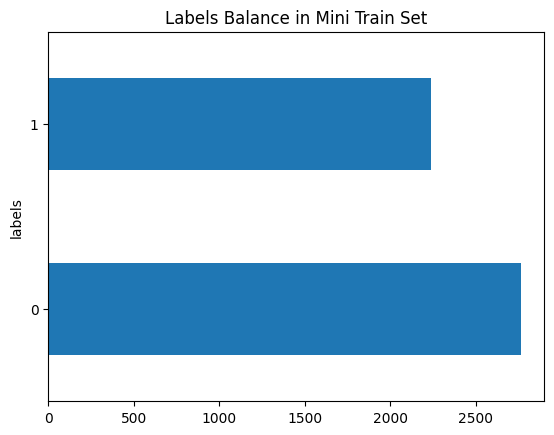

In [31]:
y_train_mini.value_counts().plot(kind="barh", title="Labels Balance in Mini Train Set")
plt.show()

Pipeline 1: CountVectorizer | LogisticRegression, Accuracy: 0.9870
Pipeline 2: TfidfVectorizer | LogisticRegression, Accuracy: 0.9698
Pipeline 3: CountVectorizer | TfidfTransformer | LogisticRegression, Accuracy: 0.9698
Pipeline 4: CountVectorizer | MultinomialNB, Accuracy: 0.9576
Pipeline 5: TfidfVectorizer | MultinomialNB, Accuracy: 0.9158
Pipeline 6: CountVectorizer | TfidfTransformer | MultinomialNB, Accuracy: 0.9158
Pipeline 7: CountVectorizer | SVC, Accuracy: 0.9746
Pipeline 8: TfidfVectorizer | SVC, Accuracy: 0.9806
Pipeline 9: CountVectorizer | TfidfTransformer | SVC, Accuracy: 0.9806
Pipeline 10: CountVectorizer | RandomForestClassifier, Accuracy: 0.9774
Pipeline 11: TfidfVectorizer | RandomForestClassifier, Accuracy: 0.9766
Pipeline 12: CountVectorizer | TfidfTransformer | RandomForestClassifier, Accuracy: 0.9794
Pipeline 13: CountVectorizer | GradientBoostingClassifier, Accuracy: 0.9948
Pipeline 14: TfidfVectorizer | GradientBoostingClassifier, Accuracy: 0.9946
Pipeline 15: 

/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  war

Pipeline 37: CountVectorizer | LinearSVC, Accuracy: 0.9880


/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  war

Pipeline 38: TfidfVectorizer | LinearSVC, Accuracy: 0.9848


/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  war

Pipeline 39: CountVectorizer | TfidfTransformer | LinearSVC, Accuracy: 0.9848
Pipeline 40: CountVectorizer | Perceptron, Accuracy: 0.9808
Pipeline 41: TfidfVectorizer | Perceptron, Accuracy: 0.9784
Pipeline 42: CountVectorizer | TfidfTransformer | Perceptron, Accuracy: 0.9784


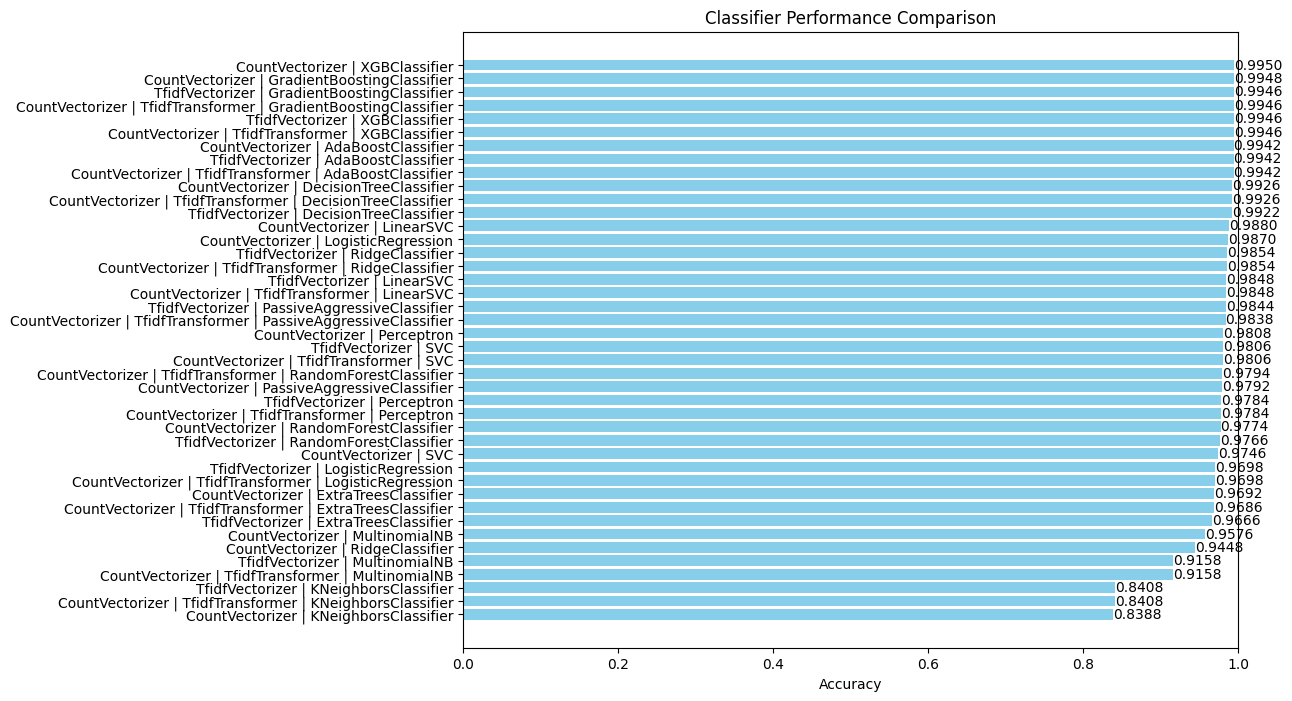

In [32]:
from helper_pipeline import compare_pipelines
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)

compare_pipelines(X_train=X_train_mini, y_train=y_train_mini, cv=cv)

In [33]:
from helper_pipeline import *

pipeline = Pipeline([('vect', CountVectorizer()), ('clf', XGBClassifier())])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [34]:
y_pred = pipeline.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report

acc_score = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f"{acc_score:.4f}")

0.9969


In [44]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4174
           1       1.00      0.99      1.00      3512

    accuracy                           1.00      7686
   macro avg       1.00      1.00      1.00      7686
weighted avg       1.00      1.00      1.00      7686



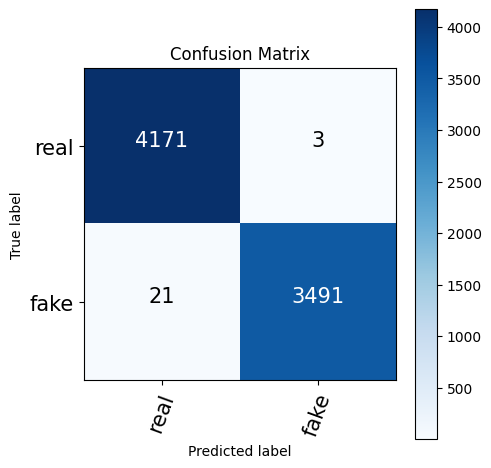

In [47]:
from helper_evaluation import make_confusion_matrix

classes = ["real", "fake"]

make_confusion_matrix(y_pred=y_pred, y_true=y_test, figsize=(5, 5), classes=classes)